# <font color='red'> TUTORIAL ON DATASETS AND RELATEDNESS </font>

In [1]:
import os

# this piece of code import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import networkx as nx
# tqdm permits to use progress bars
from tqdm.notebook import trange, tqdm
import os

In [2]:
DATA_PATH = '/Users/anmusso/Desktop/PhD/EFCSpringSchool/Group1/data'

________________________________________________________________________________________________________________________________

# <font color='blue'> Databases </font>

Economic Complexity is based on data, given the large databases available nowaday.
However, Big Data goes hand in hand with Big Noises!
The most careful approach is to consider homogeneous sets of data, one at a time, and to understaind them as much as possible.
We will discuss:
- **Export** data: export flows in dollars
- **Technological** data: patents
- **Scientific** data: data from academic output
 

## COMTRADE

Source: UN COMTRADE database (see [https://comtradeplus.un.org/](https://comtradeplus.un.org/))

Annual trade flows between countries expressed in US dollars. This information is provided at the product level, so that it is possible to study in detail which countries are exporting a given amount of a given product in a chosen year.
Products are classified according to two classification systems: *Harmonized system* (HS) and *Standard International Trade Classification* (SITC). **The data provided in the export folder follow the SITC classification.** The time span covered is **1990-2021**. Each year is a different file that can be seen as a matrix M with number of rows and columns corresponding to the number of countries and products respectively. Each element of the matrix reports the exported volume of products expressed in US dollars.

1) **HS** main properties:

- managed by the World Customs Organization (WCO) and agreed upon by states
- it is updated every 5 years
- hierarchical structure. Products are grouped in 21 sections. Within each section, they are labeled with numerical codes of different lengths depending on the level of aggregation. In particular, the possible aggregation levels are: 2-digits (including about 100 product chapters), 4-digits (product headings) and 6-digits (product sub-headings)   

Example (see https://www.wcoomd.org/en/topics/nomenclature/instrument-and-tools/hs-nomenclature-2022-edition/hs-nomenclature-2022-edition.aspx to explore HS Nomenclature 2022 edition):

**SECTION 11**: TEXTILES AND TEXTILE ARTICLES (including chapters 50-63)

**57** Carpets and other textile floor coverings

**5701** Carpets and other textile floor coverings, knotted, whether or not made up

**570110** Of wool or fine animal hair

2) **SITC** main properties:

- Well suited for academic purposes. In particular, it has longer time series than HS
- hierarchical structure over the single digit (and not over the two like in the case of HS)
- shortcoming: same codes include extremely heterogeneous products

Example:

**SECTION 7** Machinery And Transport Equipment

**Division 78** Road Vehicles (Incl.Air Cushion Vehicl.)

**782** Motor vehicles for the transport of goods and special-purpose motor vehicles

**782.1** Motor vehicles for the transport of goods

**782.11** Dumpers designed for off-highway use



## Patstat and REGPAT

In [3]:
df_tech = pd.read_csv(f'{DATA_PATH}/technology/countries_selected/{2000}-mat_ah.csv', index_col = 0)
df_tech.shape

(40, 130)

REGPAT DATABASE (see https://www.oecd-ilibrary.org/science-and-technology/the-oecd-regpat-database_241437144144)

Database in which patent documents from national and regional patent authorities around the world are collected. 
The information contained in REGPAT is a useful data source in innovation studies. In particular:

1. the Cooperative Patent Classification (CPC) codes, used by patent offices to associate the claims contained in patent applications with the specific areas of technology in which the applications make an innovative contribution, are recorded. The CPC system encompasses five hierarchical levels spanning from 9 sections to around 250000 subgroups; codes starting with the letters A to H represent a traditional classification of innovative activity in technological fields (see example 1), while the Y section tags cross-sectional technologies (see example 2).

2. Patents are geolocalised both at the regional and country level based on the 
addresses of the applicants and inventors.

3. Patents are grouped into families (i.e. group of patents covering the same 
invention). This is our unit of measure.

[here a useful link to explore the CPC: https://www.uspto.gov/web/patents/classification/cpc/html/cpc.html]. 

Examples of CPC codes showing also its hierarchical structure.

1) A-H

**G** --> PHYSICS

**G01** --> MEASURING; TESTING

**G01B** --> 	Measuring lenght, thickness or similar linear dimensions; angles; areas; irregularities of surfaces or contours

**G01B3/00** --> Measuring instruments characterised by the use of mechanical techniques

**G01B3/02** --> Rulers with scales or marks for direct reading

2) Y

**Y** --> GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPMENTS;...

**Y02E** --> REDUCTION OF GREENHOUSE GAS [GHG] EMISSIONS, RELATED TO ENERGY GENERATION, TRANSMISSION OR DISTRIBUTION

**Y02E10/00** --> Energy generation through renewable energy sources

**Y02E10/50** --> Photovoltaic [PV] energy

**Y02E10/545** --> Microcrystalline silicon PV cells




Detailed properties of the database:

Data are collected yearly. Each year is a different csv file that can be seen as a matrix M with number of rows and columns corresponding to the number of countries and technologies respectively. In addition, for each year you have two files: 
- the {year}-mat_ah.csv corresponds to the A-H technology codes (**128** technologies at a 3-lenght CPC code aggregation level, i.e. **A01**);  
- the {year}-mat_y.csv corresponds to the Y cross-sectional technology codes (**49** technologies at a 6-lenght CPC code aggregation level, i.e. **Y02A 10**).

For each country-technology (row-column) pair c-t, the value of the matrix $M_{ct}$ corresponds to the fractional count of inventions attributed to country c and technology t in the year considered

we provide you 3 folders:

- in "regions" the time span covered is **1978-2021**. Geographically, the data are **aggregated by region**. Therefore, the number of rows is equal to the number of regions, which are **674**

- in "countries" the time span covered is **1978-2021**. Geographically, the data are **aggregated by country**. Therefore, the number of rows is equal to the number of countries, which are **48**

- in "countries_selected" the time span covered is **1990-2021**. The number of countries is reduced to **40**, since we eliminated some countries with all zeros in certain years during the period 1990-2018 (these rows would create problems in the running of the EFC algorithm). **Use this folder to run EFC algorithms**. In addition, do not consider the last 3 years (2019-2021): this because patents can be put in patstat even several years (usually up to 3) after registration in patent offices. To test this, just notice how many rows/countries are all zeros in the 2021 matrix.





## Scimago and Open Academic Graph

In [16]:
scientific_codes = pd.read_csv(f'{DATA_PATH}/science/science_oag/scientific_codes_fos.csv')
scientific_codes

,id,name
0,192562407,Materials science
1,120314980,Distributed computing
2,29694066,Orthodontics
3,171250308,Nanotechnology
4,54750564,Commerce
...,...,...
304,19165224,Anthropology
305,87717796,Environmental engineering
306,134560507,Environmental economics
307,88463610,Agricultural engineering


In [17]:
df_science_cit_oag = pd.read_csv(f'{DATA_PATH}/science/science_oag/science_cit_oag_1989.csv', index_col = 0)
print(np.size(df_science_cit_oag,axis=0),np.size(df_science_cit_oag,axis=1))

78 309


In [18]:
df_science_doc_oag = pd.read_csv(f'{DATA_PATH}/science/science_oag/science_doc_oag_1989.csv', index_col = 0)
print(np.size(df_science_doc_oag,axis=0),np.size(df_science_doc_oag,axis=1))

78 309



**OPEN ACADEMIC GRAPH (OAG) DATABASE** 

(see https://www.microsoft.com/en-us/research/project/open-academic-graph/)


The OAG database collects information about scientific production in the world, classified by scientific fields. Scientific documents are assigned to countries based on the location of the authors' affiliations.

The classification of scientific sectors follows the Field of Study (FoS), defining a hierarchical structure ranging from 19 scientific fields at the highest aggregation (level 0), to 294 at level 1, to more than 80.000 at level 2. 

The scientific fields defined at level 0 are:

*   ART
*   BIOLOGY
*   BUSINESS
*   CHEMISTRY
*   COMPUTER SCIENCE
*   ECONOMICS
*   ENGINEERING
*   ENVIRONMENTAL SCIENCE
*   GEOGRAPHY
*   HISTORY
*   MATERIALS SCIENCE
*   MATHEMATICS
*   MEDICINE
*   PHILOSOPHY
*   PHYSICS
*   POLITICAL SCIENCE
*   PSYCHOLOGY
*   SOCIOLOGY

Scientific contribution is quantified either as the number of documents or as the number of received citations: in both cases the attribution to geographical areas and to FoS is performed through fractional counting.

**DETAILED DESCRIPTION OF THE DATASET**

The dataset provided in this notebook consists of one file coupling each scientific field to the corresponding code, plus two series of yearly matrices *C_cs(y)* and *D_cs(y)*, where:

* Each row *c* represents a country, described by its corresponding alpha-3 code. The total number of countries is 78.

* Each column *s* represents a scientific sector, described by a numerical code. The total number of scientific sectors is 309

* Each matrix element represents the (fractional) number of citations (for *C_cs(y)*) or documents (for *D_cs(y)*) for country *c* in scientific field *s*, in year *y*.

* The time span covered by the dataset is 1960-2018.

Note: the total number of scientific sectors would 313, which corresponds to the sum of the 19 fields at level 0 and the 294 at level 1. Due to the removal of empty columns, this number reduces to 309.

**SCIMAGO** database (see [https://www.scimagojr.com/index.php](https://))

Aggregated by Scimagolab using data available from SCOPUS, collected by Elsevier. Data are yearly collections that can be seen as matrices with number of rows and columns as the number of countries and research classes (i.e. a number of journals grouped depending on the topic)  respectevely. These matrices measure scientific performance: each document recorded in SCOPUS assigns a unitary value at each country having at least an affiliation among the authors. Thus, each country value corresponds to the number of papers produced by researchers operating from the nations, independently on the collaboration sizes.

The scientific classification implemented to group journals in research sectors is the All Science Journal Classification (ASJC). In particular, journals can be grouped by subject area (27 major thematic areas labeled with 2-digit codes) or by subject category (309 specific subject categories). Thus, the classes does not depend directly from the context of the paper but rather on the topic of the journal (therefore reducing the precision of the analysis based on capabilities).

Example:

**23** --> Environmental Science

**2311** --> Waste Management and Disposal
	

________________________________________________________________________________________________________________________________

# <font color='blue'> Graphs and Networks </font>
From Wikipedia:
*a **graph** is a structure amounting to a set of objects in which some pairs of the objects are in some sense "related". The objects correspond to mathematical abstractions called vertices (also called **nodes** or points) and each of the related pairs of vertices is called an **edge** (also called link or line)*

In python, networks can be hadled by using the module NetworkX imported in the first cell of this tutorial.

## Visualization of a monopartite graph
There are different ways to visualize a graph. NetworkX has a simple interface, as follows

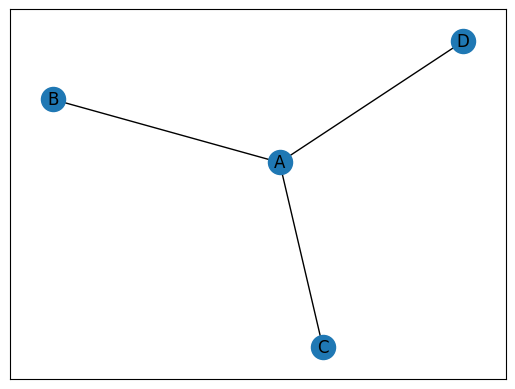

In [ ]:
g = nx.Graph()
g.add_nodes_from(["A", "B", "C", "D"])
g.add_edge("A", "B")   #Add Edge between Nodes A and B
g.add_edge("A", "C")   #Add Edge between Nodes A and C
g.add_edge("A", "D")   #Add Edge between Nodes A and D
nx.draw_networkx(g)
plt.show()     

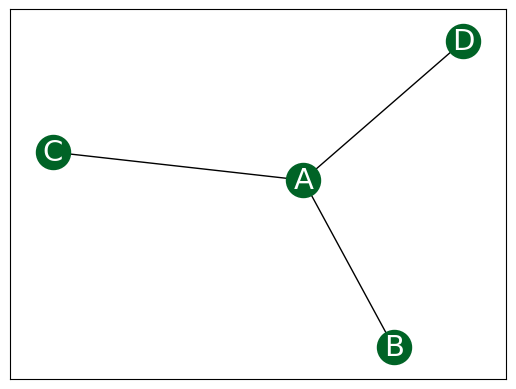

In [ ]:
# the layout of the graph (a.k.a. the position of the nodes) can be changed using specific routines:
# spring_layout, spectral_layout, ...
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos=pos, node_size=600, font_size=21, node_color='#006326', font_color='w')

In [ ]:
# read adj matrix from file
A = np.loadtxt('synthetic/Aweights.adj')
names = np.genfromtxt('synthetic/NamesSample.txt',dtype='str')
names

array(['Ab', 'Cd', 'Ef', 'Gh', 'Ij'], dtype='<U2')

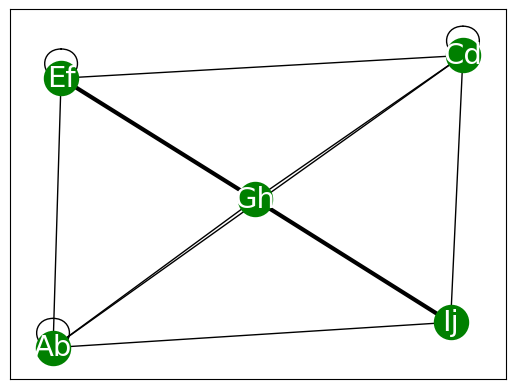

In [ ]:
# generate graph
G = nx.from_numpy_array(A)

# name nodes
mapping = {i:names[i] for i in range(len(names))}
G = nx.relabel_nodes(G, mapping)

# nodes position
posG = nx.spring_layout(G)

# edges width
edge_width_by_freq = [e[2]['weight'] for e in G.edges(data=True)]

# draw 
nx.draw_networkx(G, pos=posG, node_size=600, font_size=21, node_color='green',
                 font_color='white', width=edge_width_by_freq)

### Define a drawing routine
Now it is possible to define a routine, used in the following parts of this tutorial

In [ ]:
def simple_network_drawer(A, names, node_color, font_color, node_size, font_size, width=None, iterations=100):
    # generate graph
    G=nx.from_numpy_array(A)

    # name nodes
    mapping = dict(zip(G, names))
    G = nx.relabel_nodes(G, mapping)
    
    # nodes position
    posG = nx.spring_layout(G, iterations=iterations)

    # edges width
    if width is None:
        edge_width_by_freq = [e[2]['weight'] for e in G.edges(data=True)]
    else:
        edge_width_by_freq = width
        
    # draw 
    nx.draw_networkx(G, pos=posG, node_size=node_size, font_size=font_size, node_color=node_color,
                 font_color=font_color, width=edge_width_by_freq, edge_color='black')

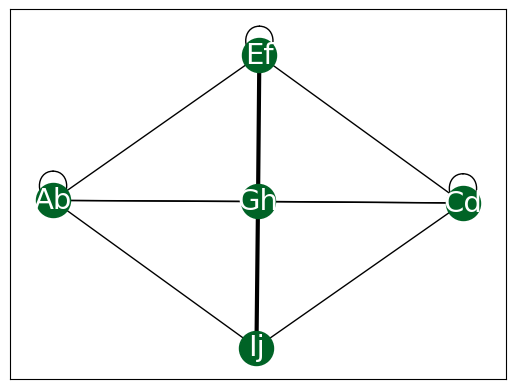

In [ ]:
simple_network_drawer(A,names,node_color='#006326',font_color='w',node_size=600, font_size=21)

## Measures of Centrality
Following the morning lecture, we can consider the measures of centrality for monopartite graphs:
* Degree
* Closeness
* Betweenness

In [ ]:
# for simplicity we load the most common example of graph, the Zachary's karate club network
A = pd.read_csv('network/adj_zachary.csv', index_col=0).to_numpy()
G = nx.from_numpy_array(A)

The degree counts the number of links connected to each node

In [ ]:
degree = A.sum(0)

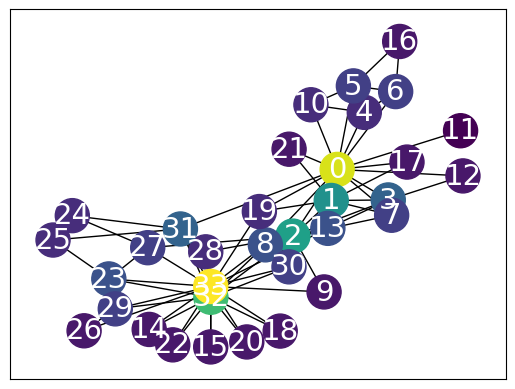

In [ ]:
# a visualization of the Zachary network where the colors of the nodes are based on their degree
simple_network_drawer(A,range(34),node_color=degree,font_color='w',node_size=600, font_size=21)

The closeness of node $x$ is 

$$C_x=\frac{1}{\sum_y d_{xy}}$$

where $d_{xy}$ is the distance between $x$ and $y$, meaning the shortest path. 
The closeness estimate how central the node is considering a simple traffic model where everybody choose always the shortest.

In [ ]:
closeness = nx.closeness_centrality(G)

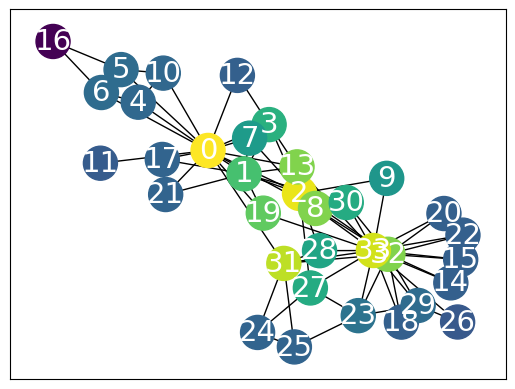

In [ ]:
# a visualization of the Zachary network where the colors of the nodes are based on their closeness
simple_network_drawer(A,range(34),node_color=list(closeness.values()),font_color='w',node_size=600, font_size=21)

Instead, if we want to consider how often a node is in the shortest path between any other pair of nodes, this is evaluated by the betweenness.

In [ ]:
betweenness = nx.betweenness_centrality(G)

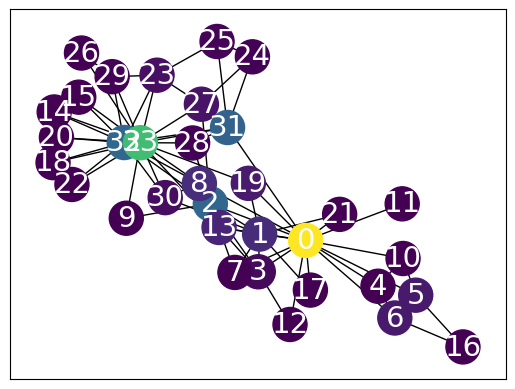

In [ ]:
# a visualization of the Zachary network where the colors of the nodes are based on their betweenness
simple_network_drawer(A,range(34),node_color=list(betweenness.values()),font_color='w',node_size=600, font_size=21)

## Bipartite networks
Bipartite networks are graphs composed by two sets of nodes with the property that each node is connected only to the other set and there is no interaction among nodes of the same set.

Examples of bipartite network can be found on many repositories of networks, such as:
* SNAP: https://snap.stanford.edu/data/
* Konect: http://www.konect.cc/
* Network repository: https://networkrepository.com/
among the others.

Here we consider a simple and widely considered bipartite network, such as the *southern women* or the two *brunson* examples. Later we focus on the economic datasets.

The adjacency, or biadjacency matrix of the bipartite network is a rectangular matrix, where the rows index one layer while the columns index the other layer. Each entry is binary, indicating the presence of an edge


In [ ]:
biadj_southern_women = pd.read_csv('network/adj_southern_women.csv', index_col=0)

In [ ]:
# can we load the adjacency matrix of a bipartite graph directly into NetworkX?
try:
    nx.from_numpy_array(biadj_southern_women.to_numpy())
except:
    print('ERROR: from_numpy_array needs a square matrix')

ERROR: from_numpy_array needs a square matrix


In [ ]:
# if you want to see the report of the error, de-comment the following line
#nx.from_numpy_matrix(biadj_southern_women.to_numpy())

We transform the bipartite matrix into an edgelist. The next code can be decomposed:
* biadj_southern_women[biadj_southern_women==1] returns positions where the adjacency is 1, otherwise it returns NaN
* .stack() trasnform the matrix into a list on all the real values (not NaN)
* .index.tolist() returns the list of the index of the list, a.k.a. the (source, target) pairs, since all the values are 1

In [ ]:
edgelist_southern_women = biadj_southern_women[biadj_southern_women==1].stack().index.tolist()

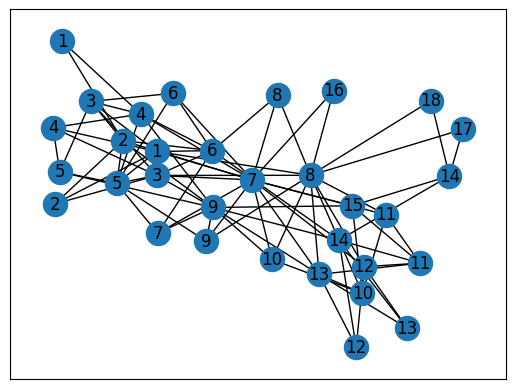

In [ ]:
# let's visualize the bipartite plot
B = nx.from_edgelist(edgelist_southern_women)
nx.draw_networkx(B)

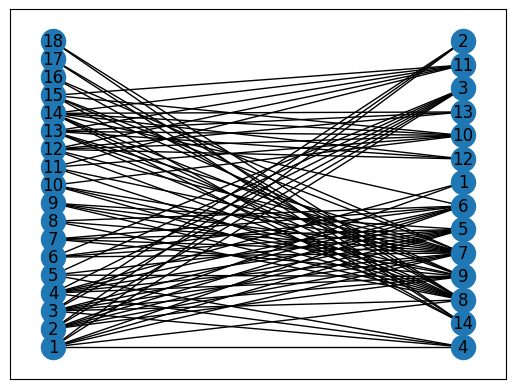

In [ ]:
# however, there is a more efficient way to visualize the network, if we know the two sets
posB = nx.bipartite_layout(B, biadj_southern_women.index)
nx.draw_networkx(B, pos=posB)

## Can we measure the nestedness on network? **NODF**
(NODF = Nestedness metric based on Overlap and Decreasing Fill)

Yesterday we discussed the idea of nestedness only through visual representations; however, nestedness can be measured. The most common measure is given by the non-overlapping decreasing fill - NODF (Almeida-Neto 2008). 
However, there are many different metrics used to estimate the *degree of nestedness* that are not completely interchangable. 

NODF in formula counts the number of overlapping between rows and between columns:

$NODF = \frac{∑{N_{paired}}}{(\frac{n(n-1)}{2})+(\frac{m(m-1)}{2})}$

**References**
- Almeida-Neto M., et alii, *A consistent metric for nestedness analysis in ecological systems: reconciling concept and measurement*, Oikos **117** (2008)


In [ ]:
def nestedness_NODF(matrix):
    deg0 = matrix.sum(1)
    deg1 = matrix.sum(0)
    dim = matrix.shape
    kmat0 = np.array([deg0 for i in range(dim[0])]).astype(np.float64)
    fill = ( kmat0.transpose() - kmat0 )
    kmat0[fill < 0] = 0
    np.divide(np.ones(kmat0.shape), kmat0, out=kmat0, where=kmat0 != 0)    
    kmat1 = np.array([deg1 for i in range(dim[1])]).astype(np.float64)
    fill = ( kmat1.transpose() - kmat1 )
    kmat1[fill < 0] = 0
    np.divide(np.ones(kmat1.shape), kmat1, out=kmat1, where=kmat1 != 0)    
    cooc0 = np.dot(matrix,matrix.transpose())
    cooc1 = np.dot(matrix.transpose(),matrix)
    cooc0 = np.multiply(cooc0,kmat0)
    cooc1 = np.multiply(cooc1,kmat1)
    norm = ( dim[0]*(dim[0]-1) + dim[1]*(dim[1]-1) )
    return ( (cooc0.sum().sum()-cooc0.diagonal().sum()) + (cooc1.sum().sum()-cooc1.diagonal().sum())) / norm

In [ ]:
nestedness_NODF(biadj_southern_women.to_numpy())

0.3006001170960187

________________________________________________________________________________________________________________________________

# <font color='blue'> Relatedness </font>
The concept of *relatedness* focuses on one of the two layers of the bipartite network, estimating a similitude among each pair of nodes of that layer. It is usually represented as a network where the links express the occurrence or the strength of the interactions between the nodes (Hidalgo 2007).

There are different methods to evaluate the similitudes between the nodes producing different and heterogeneous results (Tacchella 2021).
However, most of the methods applied in the Economic Complexity datasets present a core-periphery structure, with hubs and leafs associated with similar types of activities or arranged into meaningful communities.

**References**
- Hidalgo, C. A., Klinger, B., Barabási, A. L., & Hausmann, R. (2007). The product space conditions the development of nations. Science, 317(5837), 482-487

- Tacchella, A., Zaccaria, A., Miccheli, M., & Pietronero, L. (2021). Relatedness in the era of machine learning. arXiv preprint arXiv:2103.06017.

## Bipartite network projection: co-occurrence count
The easiest way to project a bipartite graph into one of the two layers is evaluating the co-occurrence, meaning the link strength between any two node of the projected layer is proportional to the number of common neighbors on the other layer. 

In formula:
$$ \large  J_{p p'} = \sum_{c}M_{c p} M_{c p'} $$
and
$$ \large  J_{c c'} = \sum_{p}M_{c p} M_{c' p} $$



"*Since the one-mode projection is always less informative than the original bipartite network, to better reflect structure of the network one has to use the bipartite graph to quantify the weights in the projection graph*" 

**References**
- Zhou T., et al., *Bipartite network projection and personal recommendation*, PRE (2007) 76(4)

Let's consider, as a first example, the brunson membership club network.
*This bipartite network contains membership information of corporate executive officers in social organisations such as clubs and boards. Left nodes represent persons and right nodes represent social organisations. An edge between a person and a social organization shows that the person has a memberstatus.* (from rdrr.io)

In [ ]:
biadj_club = pd.read_csv('network/adj_brunson_membership_club.csv', index_col=0)

The co-occurrence can be computed as a matrix multiplication (dot product) of the biadjacency matrix with itself

$ J = (M M^T)$

In [ ]:
Jcc = biadj_club.dot(biadj_club.transpose())

Let's see the co-occurrence matrix, being now a weighted monopartite network

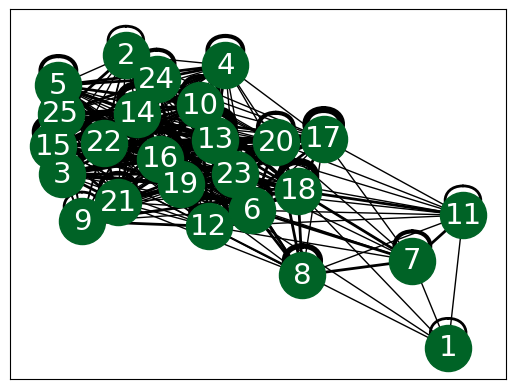

In [ ]:
simple_network_drawer(Jcc.to_numpy(),names=Jcc.columns,node_color='#006326',font_color='w',node_size=1100, font_size=21)

Cristal clear, right?

## Product Space

The first study of relatedness in Economic Complexity, is the Product Space (Hidalgo 2007), based on exported products.
The similitude is evaluated using the **proximity**, a measure of normalized export pair co-occurrence:
$$\large S_{p p'} = \frac{1}{max(u_p,u_{p'})}\sum_{c}M_{c p} M_{c p'}, \qquad u_p = \sum_cM_{cp}.$$

The proximity was described as the *conditional probability of exporting good product i given that you export good j*, (although it has not a clear structure of a conditional probability).


In [ ]:
def Proximity_network(M, rows=False):
    if rows:
        M = M.transpose()
    Cooc = np.matmul(np.transpose(M),M)
    ubiquity = M.sum(0)
    ubiMat = np.tile(ubiquity,[M.shape[1],1])
    ubiMax = np.maximum(ubiMat,np.transpose(ubiMat)).astype(float)
    np.divide(np.ones_like(ubiMax,dtype=float), ubiMax, out=ubiMax, where=ubiMax != 0)
    Product_Space = np.multiply(Cooc,ubiMax)
    return Product_Space


In [ ]:
# let's compute the proximity network
proximity_club = Proximity_network(biadj_club.to_numpy())

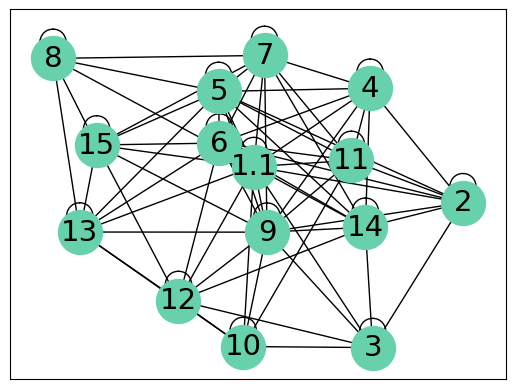

In [ ]:
# Look, it is quite dense! There are also self-loops around each node
simple_network_drawer(proximity_club, biadj_club.columns, node_color='#66d1aa', font_color='k', node_size=1000, font_size=21, width=1)

In [ ]:
# we can evaluate the minimum spanning tree of proximity network, considering the proximity as a weight. 
# We use the networkx python module to compute it efficiently
G_PS_club = nx.from_numpy_array(proximity_club)
ST_PS_club = nx.minimum_spanning_tree(G_PS_club)
ST_PS_club_matrix = nx.to_numpy_array(ST_PS_club)

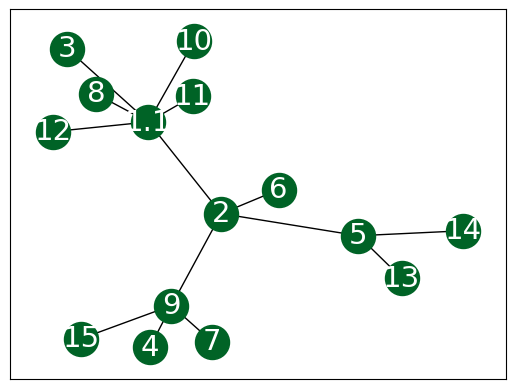

In [ ]:
simple_network_drawer(ST_PS_club_matrix, names=biadj_club.columns, node_color='#006326', font_color='w', node_size=600, font_size=21, width=1)

In [ ]:
biadj_revolution = pd.read_csv('network/adj_brunson_revolution.csv', index_col=0)
prod_space_revo = Proximity_network(biadj_revolution.to_numpy())

In [ ]:
PS_G = nx.from_numpy_array(prod_space_revo)
T = nx.minimum_spanning_tree(PS_G)
PST_M = nx.to_numpy_array(T)

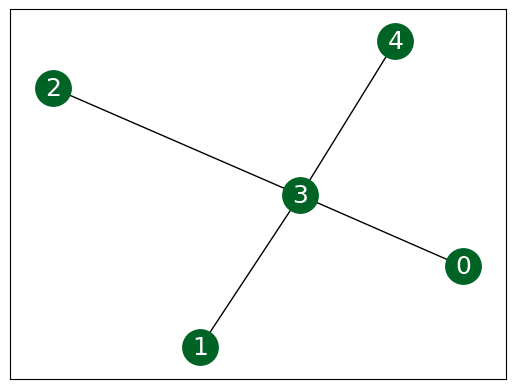

In [ ]:
simple_network_drawer(PST_M,names=range(7),node_color='#006326',font_color='w',node_size=650, font_size=18, width=1)

## Taxonomy network

"*We want to build a **hierarchically ordered network**, whose structure is inferred from the bipartite matrix. The idea can be easily understood by means of the concept of capability. Let us define the products in terms of the capabilities which are needed to conceive and produce them. For example, the capability 1 corresponds to a basic product. A country equipped with a second capability, 2, can export the ‘‘12’’ product. Capabilities 1,2 and 3 could simply not lead to a product, while ‘‘134’’ can be a product, and so on. A hierarchy naturally arises, in which some products are mandatory intermediate steps to be able to produce more complex technologies, and the sons are connected to the father by a directed edge.*" (Zaccaria 2014)


$$ \large T_{p p'} =\frac{1}{max(u_p,u_{p'})} \sum_{c}\frac{M_{c p} M_{c p'}}{d_c}, \qquad  d_c=\sum_{p}M_{c p} $$

*The idea is to compute the excess frequency of occurence of a product conditioned to the presence of another one with respect to the random binomial case with probability $d_c=N_p$*.

**References**
- Zaccaria A., et al., *How the Taxonomy of Products Drives the Economic Development of Countries*, PLoS ONE (2014), 9(12)


In [ ]:
def Taxonomy_Network(M, rows=False):
    if rows:
        M = M.transpose()
    diversification = M.sum(1)
    divMat = np.transpose(np.tile(diversification,[M.shape[1],1]))
    Mdiv = np.divide(M,divMat,where=divMat != 0)
    A = np.matmul(np.transpose(M),Mdiv)
    
    ubiquity = M.sum(0)
    ubiMat = np.tile(ubiquity,[M.shape[1],1])
    ubiMax = np.maximum(ubiMat,np.transpose(ubiMat)).astype(float)
    np.divide(np.ones_like(ubiMax,dtype=float), ubiMax, out=ubiMax, where=ubiMax != 0)
    Taxonomy_Network = np.multiply(A,ubiMax)
    return Taxonomy_Network


In [ ]:
# let's compute the taxonomy network
Taxonomy_club = Taxonomy_Network(biadj_club.to_numpy())

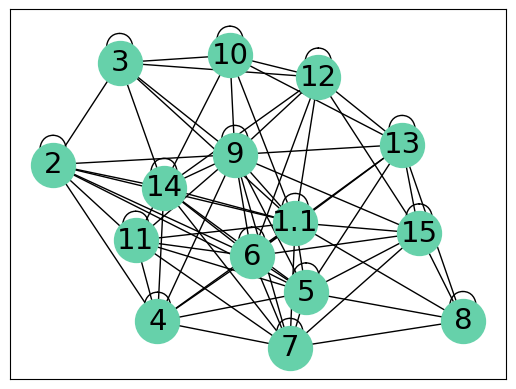

In [ ]:
# Look, it is quite dense! There are also self-loops around each node
simple_network_drawer(Taxonomy_club,biadj_club.columns,node_color='#66d1aa',font_color='k',node_size=1000, font_size=21, width=1)

In [ ]:
G_TN_club = nx.from_numpy_array(Taxonomy_club)
ST_TN_club = nx.minimum_spanning_tree(G_TN_club)
ST_TN_club_matrix = nx.to_numpy_array(ST_TN_club)

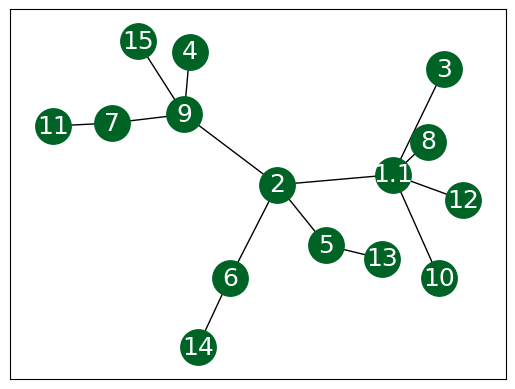

In [ ]:
simple_network_drawer(ST_TN_club_matrix,biadj_club.columns,node_color='#006326',font_color='white',node_size=650, font_size=18, width=1, iterations=100)

________________________________________________________________________________________________________________________________

# <font color='blue'> Real data </font>

In this section we study the datasets used in Economic Complexity in a simplified forms with a rather low level of description. 
Finer classifications can be analysed straightforwardly, with a much higher computational cost (not feasible on these tutorials) but with typically a much more detailed and informative result.

## Exports
We use the data presented in the previous tutorial, using the SITC classification that goes back in time much more than the more reliable Harmonized System classification described above in the present tutorial.
This choice is due to a balance between the didactical purpose of this tutorial and the feasibility of the analysis.

For simplicity we focus on 2000, a year with a representative data.

In [6]:
year = 2000
export = pd.read_csv(f'{DATA_PATH}/export/export_sitc_rev2_{year}.csv', index_col=0)
mat = ((export/export.sum(0)).transpose()/export.sum(1)*export.sum().sum()).transpose().fillna(0)
binary_rca = (mat>=1).astype(int)

Load the classification names

In [8]:
classification_export = pd.read_csv(f'{DATA_PATH}/export/sitc_rev2_classification.csv', index_col=0)

In [10]:
# random colors for node classification
colors = pd.read_csv(f'{DATA_PATH}/colors.csv', sep=';', index_col=1).sort_values('Color name')
color_scale = {'{}'.format(e):colors[::2].index[e] for e in range(10)}

### Product Space
Let's analyse the Product Space relatedness of the export data.

In [11]:
proximity_export = Proximity_network(binary_rca.to_numpy())
G_PS_export = nx.from_numpy_array(proximity_export)
ST_PS_export = nx.minimum_spanning_tree(G_PS_export)
ST_PS_export_matrix = nx.to_numpy_array(ST_PS_export)

NameError: name 'Proximity_network' is not defined

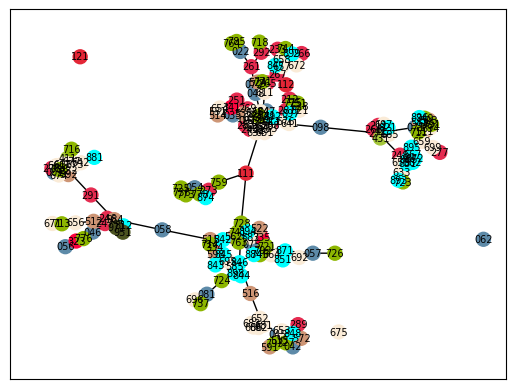

In [ ]:
simple_network_drawer(ST_PS_export_matrix, binary_rca.columns, node_color=[color_scale[e[0]] for e in binary_rca.columns], font_color='black', node_size=100, font_size=7, width=1, iterations=200)

### Taxonomy network
Let's analyse the Taxonomy network relatedness of the export data.

In [ ]:
taxonomy_export = Taxonomy_Network(binary_rca.to_numpy())
G_TN_export = nx.from_numpy_array(taxonomy_export)
ST_TN_export = nx.minimum_spanning_tree(G_TN_export)
ST_TN_export_matrix = nx.to_numpy_array(ST_TN_export)

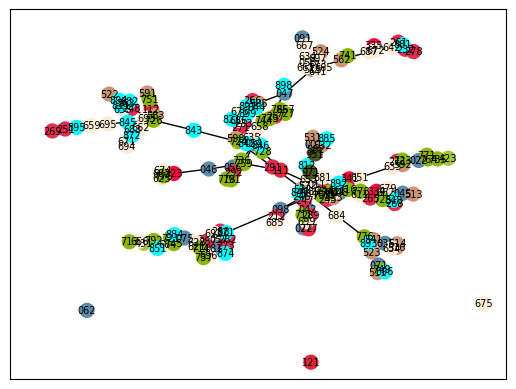

In [ ]:
simple_network_drawer(ST_TN_export_matrix, binary_rca.columns, node_color=[color_scale[e[0]] for e in binary_rca.columns], font_color='black', node_size=100, font_size=7, width=1, iterations=1000)

## Technology

In [ ]:
year = 2000
export = pd.read_csv('technology/countries_selected/{}-mat_ah.csv'.format(year), index_col=0)
mat = ((export/export.sum(0)).transpose()/export.sum(1)*export.sum().sum()).transpose().fillna(0)
binary_rca = (mat>=1).astype(int)

In [ ]:
# random colors for node classification
colors = pd.read_csv('colors.csv', sep=';', index_col=1).sort_values('Color name')
cpc1d = 'ABCDEFGH'
color_scale = {'{}'.format(cpc1d[e]):colors[::2].index[e] for e in range(8)}

### Product Space

In [ ]:
proximity_tech = Proximity_network(binary_rca.to_numpy())
G_PS_tech = nx.from_numpy_array(proximity_tech)
ST_PS_tech = nx.minimum_spanning_tree(G_PS_tech)
ST_PS_tech_matrix = nx.to_numpy_array(ST_PS_tech)

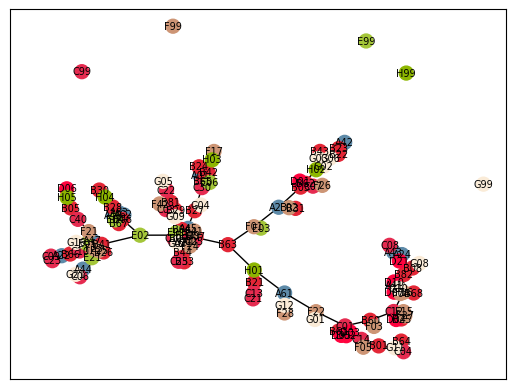

In [ ]:
simple_network_drawer(ST_PS_tech_matrix,binary_rca.columns,node_color=[color_scale[e[0]] for e in binary_rca.columns],font_color='black',node_size=100, font_size=7, width=1, iterations=200)

### Taxonomy network

In [ ]:
taxonomy_tech = Taxonomy_Network(binary_rca.to_numpy())
G_TN_tech = nx.from_numpy_array(taxonomy_tech)
ST_TN_tech = nx.minimum_spanning_tree(G_TN_tech)
ST_TN_tech_matrix = nx.to_numpy_array(ST_TN_tech)

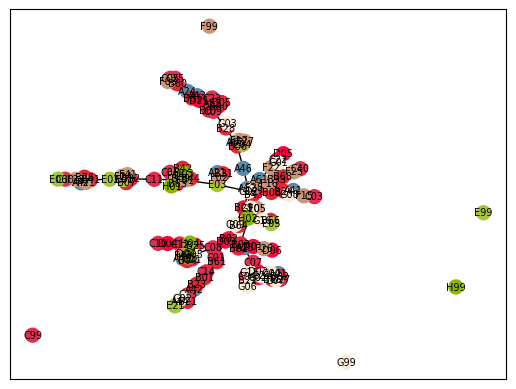

In [ ]:
simple_network_drawer(ST_TN_tech_matrix,binary_rca.columns,node_color=[color_scale[e[0]] for e in binary_rca.columns],font_color='black',node_size=100, font_size=7, width=1, iterations=1000)

## Science (SCImago)

In [ ]:
year = 2000
science = pd.read_csv('science/science_scimago/cit-{}.csv'.format(year), index_col=0)
mat = ((science/science.sum(0)).transpose()/science.sum(1)*science.sum().sum()).transpose().fillna(0)
binary_rca = (mat>=1).astype(int)

### Product Space

In [ ]:
proximity_sci = Proximity_network(binary_rca.to_numpy())
G_PS_sci = nx.from_numpy_array(proximity_sci)
ST_PS_sci = nx.minimum_spanning_tree(G_PS_sci)
ST_PS_sci_matrix = nx.to_numpy_array(ST_PS_sci)

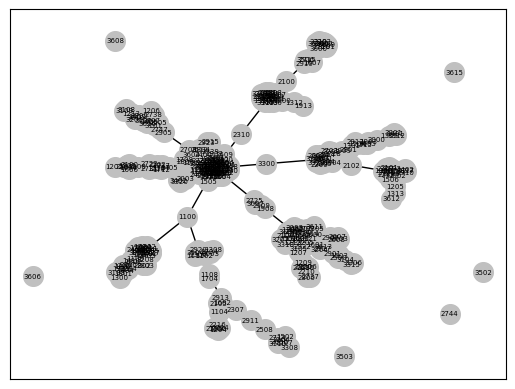

In [ ]:
simple_network_drawer(ST_PS_sci_matrix, binary_rca.columns, node_color='silver', font_color='black', node_size=200, font_size=5, width=1, iterations=300)

### Taxonomy network

In [ ]:
taxonomy_sci = Taxonomy_Network(binary_rca.to_numpy())
G_TN_sci = nx.from_numpy_array(taxonomy_sci)
ST_TN_sci = nx.minimum_spanning_tree(G_TN_sci)
ST_TN_sci_matrix = nx.to_numpy_array(ST_TN_sci)

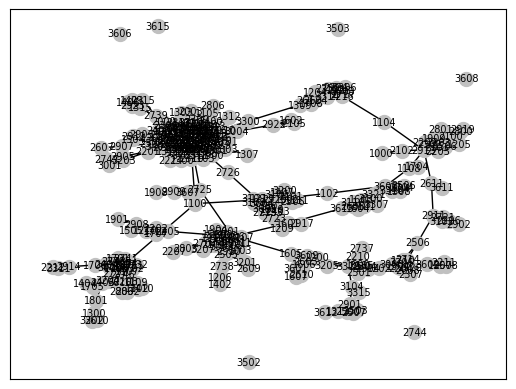

In [ ]:
simple_network_drawer(ST_TN_sci_matrix, binary_rca.columns, node_color='silver', font_color='black',node_size=100, font_size=7, width=1, iterations=1000)

--------------------------------------------------------------------------------

# <font color='blue'> Product Progression </font>

## Prediction from density

*Following the literature, we define predictive models from the relatedness topologies by considering the density of products in which a country has RCA > 1 around the target product p weighted by the relatedness score. More precisely, given a relatedness matrix B computed on data that excludes country c, we define*

$$ \mathcal{M}_p\left( M^t_{cp} \right) = \mathcal{S}_{c,p}^{t+\delta} = \frac{\sum_{p'}B_{pp'}M_{cp'}^t}{\sum_{p'}B_{pp'}} $$

(Tacchella 2021)

In [ ]:
def predict_from_density(similarity_matrix, mcp):
    similarity_matrix = similarity_matrix.transpose()
    row = similarity_matrix.sum(1)
    pr = np.divide(np.dot(mcp, similarity_matrix),row, where=row != 0)
    pr[np.where(np.isnan(pr))] = 0
    return pr

In [ ]:
year = 2010
export = pd.read_csv('export/export_sitc_rev2_{}.csv'.format(year), index_col=0)
rca = ((export/export.sum(0)).transpose()/export.sum(1)*export.sum().sum()).transpose().fillna(0)
binary_rca = (rca>=1).astype(int)

In [ ]:
# let's compute the proximity and the taxonomy networks
proximity_export = Proximity_network(binary_rca.to_numpy())
taxonomy_export = Taxonomy_Network(binary_rca.to_numpy())

In [ ]:
# The prediction of such networks can be naively done using the routine defined above
prediction_proximity = predict_from_density(proximity_export, binary_rca)
prediction_taxonomy = predict_from_density(taxonomy_export, binary_rca)

Of course different parameters can give different precisions, but for the sake of simplicity we keep only a set of them:
dt = 5 years

In [ ]:
delta = 5
export = pd.read_csv('export/export_sitc_rev2_{}.csv'.format(year+delta), index_col=0)
mat = ((export/export.sum(0)).transpose()/export.sum(1)*export.sum().sum()).transpose().fillna(0)
y_true = (mat>=1).astype(int)

we mask the prediction only on the elements that were 0 at t0, and might become 1 at t0+dt


In [ ]:
mask = (binary_rca==0)

first of all we have to binarize the networks, and the easiest way is to set a threshold, ranging from the minimun to the maximal values.

Then we evaluate the precision, the recall and the F1 score

In [ ]:
# prediction using the proximity
space = np.linspace(0,1,100)
Statistics_proximity = pd.DataFrame(index=space, columns=['TPR','FPR','F1'])
for pos in trange(100):
    threshold = space[pos]
    
    y_pred = (prediction_proximity>=threshold).astype(int)

    true_positive = ((y_pred==1) & (y_true==1))[mask].sum().sum()
    true_negative = ((y_pred==0) & (y_true==0))[mask].sum().sum()
    false_positive = ((y_pred==1) & (y_true==0))[mask].sum().sum()
    false_negative = ((y_pred==0) & (y_true==1))[mask].sum().sum()
    
    precision = true_positive / (true_positive+false_positive)
    recall = true_positive / (true_positive+false_negative)
    
    if precision+recall>0:
      F1score = 2.0*precision*recall/(precision+recall)
    else:
      F1score = 0.0
    
    Statistics_proximity.loc[threshold,'TPR'] = recall
    Statistics_proximity.loc[threshold,'FPR'] = false_positive / (false_positive+true_negative)
    Statistics_proximity.loc[threshold,'F1'] = F1score
    

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# prediction using the taxonomy
space = np.linspace(0,1,100)
Statistics_taxonomy = pd.DataFrame(index=space, columns=['TPR','FPR','F1'])
for pos in trange(100):
    threshold = space[pos]

    y_pred = (prediction_taxonomy>=threshold).astype(int)

    true_positive = ((y_pred==1) & (y_true==1))[mask].sum().sum()
    true_negative = ((y_pred==0) & (y_true==0))[mask].sum().sum()
    false_positive = ((y_pred==1) & (y_true==0))[mask].sum().sum()
    false_negative = ((y_pred==0) & (y_true==1))[mask].sum().sum()
    
    if true_positive+false_positive>0:
      precision = true_positive / (true_positive+false_positive)
    else:
      precision = np.nan
    recall = true_positive / (true_positive+false_negative)
    
    if precision+recall>0:
      F1score = 2.0*precision*recall/(precision+recall)
    else:
      F1score = 0.0
    
    Statistics_taxonomy.loc[threshold,'TPR'] = recall
    if false_positive+true_negative>0:
      Statistics_taxonomy.loc[threshold,'FPR'] = false_positive / (false_positive+true_negative)
    else:
      Statistics_taxonomy.loc[threshold,'FPR'] = 0.0
    Statistics_taxonomy.loc[threshold,'F1'] = F1score
    

In [ ]:
# prediction using the rca
space = np.hstack([np.array([0]),np.geomspace(rca[rca!=0].min().min(),rca.max().max(),99)])
Statistics_rca = pd.DataFrame(index=space, columns=['TPR','FPR','F1'])
for pos in trange(100):
    threshold = space[pos]

    y_pred = (rca>=threshold).astype(int)

    true_positive = ((y_pred==1) & (y_true==1))[mask].sum().sum()
    true_negative = ((y_pred==0) & (y_true==0))[mask].sum().sum()
    false_positive = ((y_pred==1) & (y_true==0))[mask].sum().sum()
    false_negative = ((y_pred==0) & (y_true==1))[mask].sum().sum()
    
    if true_positive+false_positive>0:
      precision = true_positive / (true_positive+false_positive)
    else:
      precision = 0.0
    recall = true_positive / (true_positive+false_negative)
    
    if precision+recall>0:
      F1score = 2.0*precision*recall/(precision+recall)
    else:
      F1score = 0.0
    
    Statistics_rca.loc[threshold,'TPR'] = recall
    if false_positive+true_negative>0:
      Statistics_rca.loc[threshold,'FPR'] = false_positive / (false_positive+true_negative)
    else:
      Statistics_rca.loc[threshold,'FPR'] = 0.0
    Statistics_rca.loc[threshold,'F1'] = F1score
    

The statistics can be visualized showing the true positive ratio w.r.t. the false positive ratio 

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set(xscale='linear',yscale='linear')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')

plt.xlabel('FPR', size=20, x=0.5)
plt.ylabel('TPR', size=20, y=0.5)

ax.plot(Statistics_proximity['FPR'], Statistics_proximity['TPR'], color='red', label='Proximity (Product Space)')
ax.plot(Statistics_taxonomy['FPR'], Statistics_taxonomy['TPR'], color='blue', label='Taxonomy')
ax.plot(Statistics_rca['FPR'], Statistics_rca['TPR'], color='green', label='RCA')

ax.legend(frameon=False, fontsize=16)

while the best F1 statistics are:

In [ ]:
print('Proximity: {:.4f}'.format(Statistics_proximity['F1'].max()))
print('Taxonomy:  {:.4f}'.format(Statistics_taxonomy['F1'].max()))
print('RCA:       {:.4f}'.format(Statistics_rca['F1'].max()))

------------------------------------------------------------------------------------

# <font color='blue'> Exercises </font>
The following task are though to give you the possibility to play with the codes

1) Compute the taxonomy network and the product space on scientific OAG citation data for a year *y* of your choice, both on the countries and on the scientific fields layer. Data is stored in the folder science/science_oag with the name 'science_cit_oag_{}.csv'.format(y).

2) For such projections, find the couples of countries and of scientific fields sharing the highest relatedness value.

3) Choose a couple of countries and scientific sectors for the scientific OAG citation data, and compute their relatedness value through the Taxonomy Network for all years of the dataset. Plot the obtained trends in a relatedness vs years plot.